In [ ]:
!pip install gdown

In [ ]:
# https://drive.google.com/file/d/14mAxb7eAsrins4L_TT7_AvfmwNffyXmc/view?usp=sharing
FILE_ID = "14mAxb7eAsrins4L_TT7_AvfmwNffyXmc"

!gdown --id {FILE_ID} -O /content/dataset.7z

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=14mAxb7eAsrins4L_TT7_AvfmwNffyXmc
From (redirected): https://drive.google.com/uc?id=14mAxb7eAsrins4L_TT7_AvfmwNffyXmc&confirm=t&uuid=40bfbdcd-0f59-4e45-a583-006e6a05296b
To: /content/dataset.7z
100% 1.31G/1.31G [00:24<00:00, 53.1MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/dataset/dataset.7z /content/
!ls -lh /content/

total 1.1G
-rw------- 1 root root 1.1G Oct 28 07:00 dataset.7z
drwx------ 5 root root 4.0K Oct 28 06:59 drive
drwxr-xr-x 1 root root 4.0K Oct 24 13:37 sample_data


In [ ]:
!apt-get install -y p7zip-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
!7z x /content/dataset.7z -o/content/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 1314325250 bytes (1254 MiB)

Extracting archive: /content/dataset.7z
--
Path = /content/dataset.7z
Type = 7z
Physical Size = 1314325250
Headers Size = 222326
Method = LZMA2:22
Solid = +
Blocks = 2

  0%      0% 52         0% 228 - dataset/test/bawang_putih/adsa (66).jpg                                                    1% 275 - dataset/test/bawang_putih/IMG_0756.jpg                                                   1% 283 - dataset/test/bawang_putih/IMG_0818.j

## Setting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tensorflow.keras.preprocessing.image import load_img

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
DATASET_PATH = 'dataset/'

TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
VAL_DIR = os.path.join(DATASET_PATH, 'validation')
TEST_DIR = os.path.join(DATASET_PATH, 'test')

In [ ]:
def analyze_dataset(base_dir, split_name):
    classes = sorted([d for d in os.listdir(base_dir)
                     if os.path.isdir(os.path.join(base_dir, d))])

    print(f"Found {len(classes)} classes: {classes}")

    data = []

    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)

        images = [f for f in os.listdir(class_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

        num_images = len(images)
        print(f"  {class_name}: {num_images} images")

        sample_size = min(10, num_images)
        sample_images = random.sample(images, sample_size)

        sample_dims = []
        sample_sizes_kb = []

        for img_file in sample_images:
            img_path = os.path.join(class_dir, img_file)

            img = cv2.imread(img_path)

            if img is not None:
                sample_dims.append(img.shape)

                file_size = os.path.getsize(img_path) / 1024
                sample_sizes_kb.append(file_size)

        if sample_dims:
            avg_height = np.mean([d[0] for d in sample_dims])
            avg_width = np.mean([d[1] for d in sample_dims])
            avg_channels = sample_dims[0][2]
        else:
            avg_height = avg_width = avg_channels = 0

        avg_size_kb = np.mean(sample_sizes_kb) if sample_sizes_kb else 0

        data.append({
            'Class': class_name,
            'Count': num_images,
            'Avg Height': int(avg_height),
            'Avg Width': int(avg_width),
            'Channels': int(avg_channels),
            'Avg Size (KB)': round(avg_size_kb, 1)
        })

    df = pd.DataFrame(data)
    return df, classes

print("="*60)
print("DATASET ANALYSIS")
print("="*60)

train_df, class_names = analyze_dataset(TRAIN_DIR, "TRAIN")
val_df, _ = analyze_dataset(VAL_DIR, "VALIDATION")
test_df, _ = analyze_dataset(TEST_DIR, "TEST")

NUM_CLASSES = len(class_names)

DATASET ANALYSIS
Found 16 classes: ['ayam', 'bawang_merah', 'bawang_putih', 'brokoli', 'daging', 'ikan', 'kembang_kol', 'kentang', 'kubis', 'tahu', 'tauge', 'telur', 'tempe', 'terong', 'tomato', 'wortel']
  ayam: 637 images
  bawang_merah: 637 images
  bawang_putih: 637 images
  brokoli: 637 images
  daging: 637 images
  ikan: 637 images
  kembang_kol: 637 images
  kentang: 637 images
  kubis: 637 images
  tahu: 637 images
  tauge: 637 images
  telur: 637 images
  tempe: 637 images
  terong: 637 images
  tomato: 637 images
  wortel: 637 images
Found 16 classes: ['ayam', 'bawang_merah', 'bawang_putih', 'brokoli', 'daging', 'ikan', 'kembang_kol', 'kentang', 'kubis', 'tahu', 'tauge', 'telur', 'tempe', 'terong', 'tomato', 'wortel']
  ayam: 127 images
  bawang_merah: 127 images
  bawang_putih: 127 images
  brokoli: 127 images
  daging: 127 images
  ikan: 127 images
  kembang_kol: 127 images
  kentang: 127 images
  kubis: 127 images
  tahu: 127 images
  tauge: 127 images
  telur: 127 images


In [ ]:
df_combined = train_df.merge(val_df, on='Class', suffixes=('_Train', '_Val'))
df_combined = df_combined.merge(test_df, on='Class')
df_combined.rename(columns={
    'Count': 'Count_Test',
    'Avg Height': 'Avg Height_Test',
    'Avg Width': 'Avg Width_Test',
    'Channels': 'Channels_Test',
    'Avg Size (KB)': 'Avg Size (KB)_Test'
}, inplace=True)

print("\nCombined Dataset Summary:")
df_combined.head()



Combined Dataset Summary:


Class  Count_Train  Avg Height_Train  Avg Width_Train  \
0          ayam          637               350              434   
1  bawang_merah          637               115              115   
2  bawang_putih          637              2030             2160   
3       brokoli          637               277              340   
4        daging          637               416              416   

   Channels_Train  Avg Size (KB)_Train  Count_Val  Avg Height_Val  \
0               3                 21.9        127             339   
1               3                  5.9        127             162   
2               3                294.3        127            2692   
3               3                 50.7        127             266   
4               3                 26.2        127             416   

   Avg Width_Val  Channels_Val  Avg Size (KB)_Val  Count_Test  \
0            378             3               22.9          86   
1            162             3               17.4          86   
2           2388             3              419.2          86   
3            340             3               37.6          86   
4            416             3               25.6          86   

   Avg Height_Test  Avg Width_Test  Channels_Test  Avg Size (KB)_Test  
0              383             489              3                20.9  
1              146             146              3                 7.5  
2             1135            1473              3               198.7  
3              224             224              3                36.0  
4              416             416              3                24.2

In [ ]:
total_train_images = train_df['Count'].sum()
total_val_images = val_df['Count'].sum()
total_test_images = test_df['Count'].sum()

print("="*60)
print("SUMMARY")
print(f"Total Classes: {NUM_CLASSES}")
print(f"Total Training Images: {total_train_images}")
print(f"Total Validation Images: {total_val_images}")
print(f"Total Test Images: {total_test_images}")
print("="*60)

SUMMARY
Total Classes: 16
Total Training Images: 10192
Total Validation Images: 2032
Total Test Images: 1376


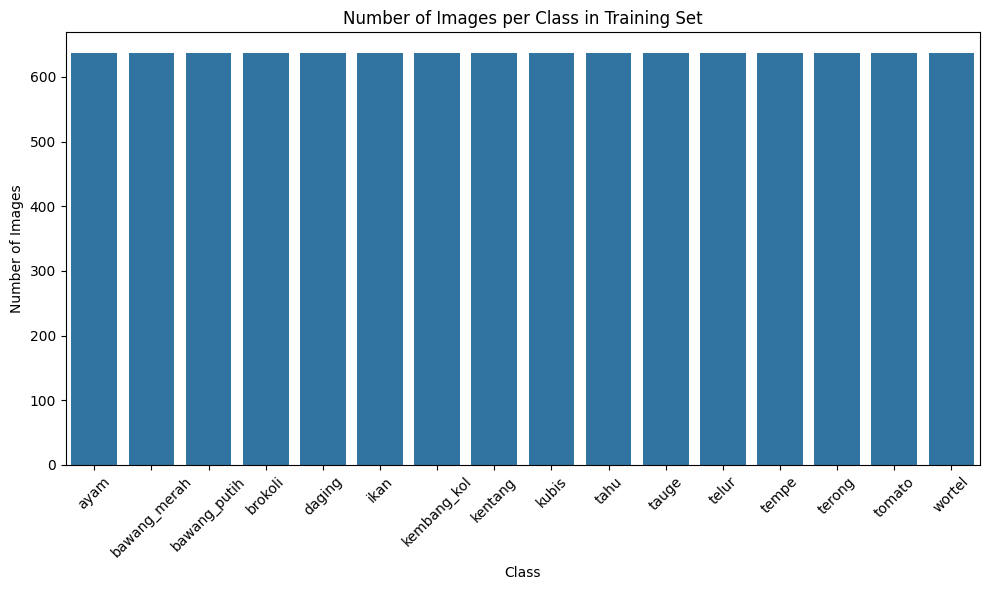

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Count', data=train_df)
plt.title('Number of Images per Class in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

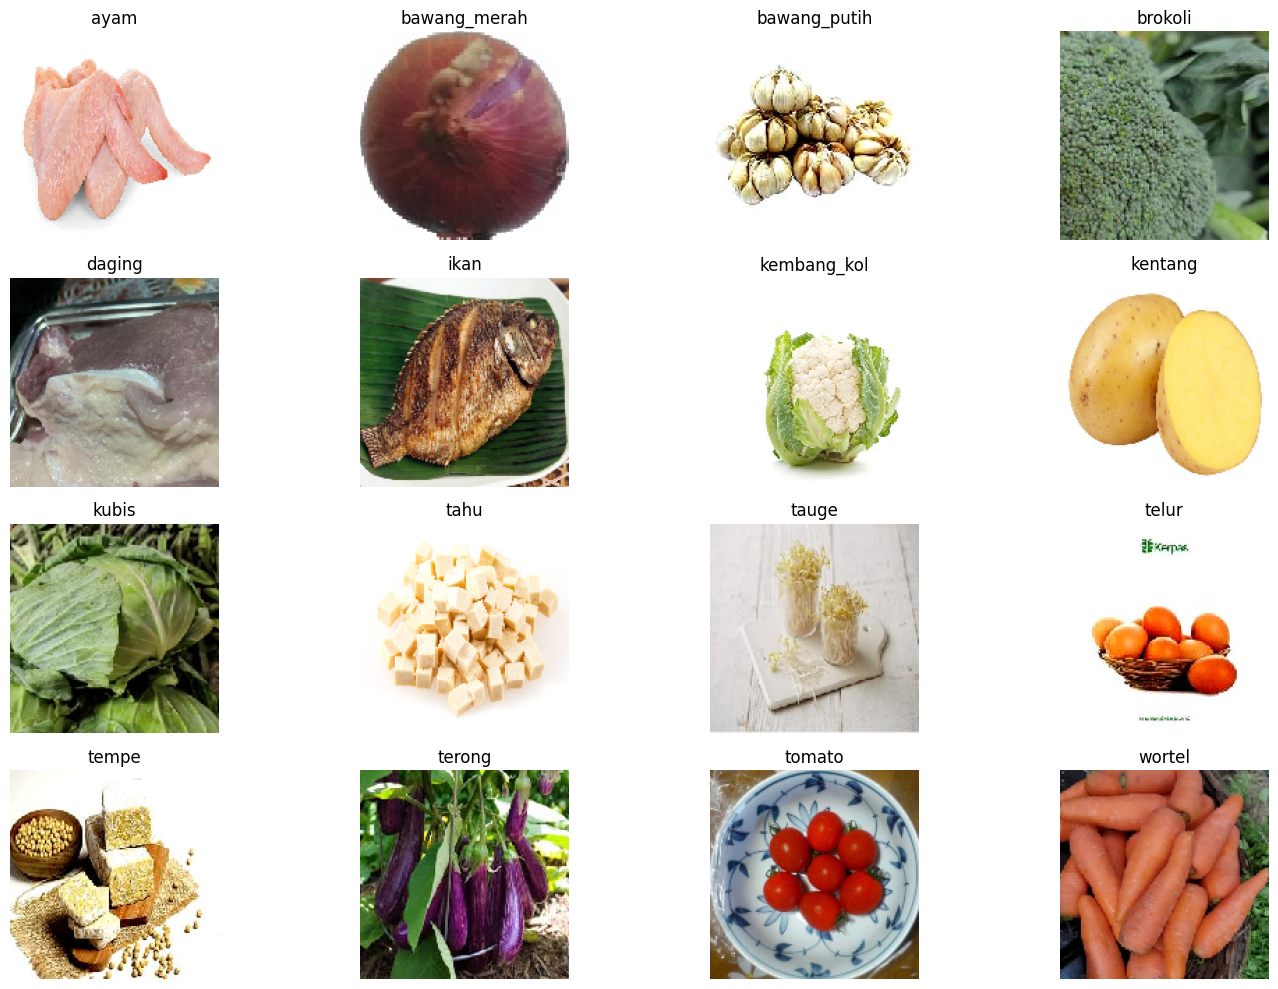

In [ ]:
def display_sample_images(base_dir, class_names):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        images = [f for f in os.listdir(class_dir)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

        if images:
            img_file = random.choice(images)
            img_path = os.path.join(class_dir, img_file)
            img = load_img(img_path, target_size=(150, 150))
            plt.subplot(4, 4, i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()
display_sample_images(TRAIN_DIR, class_names)

## PREPROCESSING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 128

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.10,
    brightness_range=[0.90, 1.10],
    fill_mode='constant'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 10186 images belonging to 16 classes.
Found 2030 images belonging to 16 classes.
Found 1374 images belonging to 16 classes.


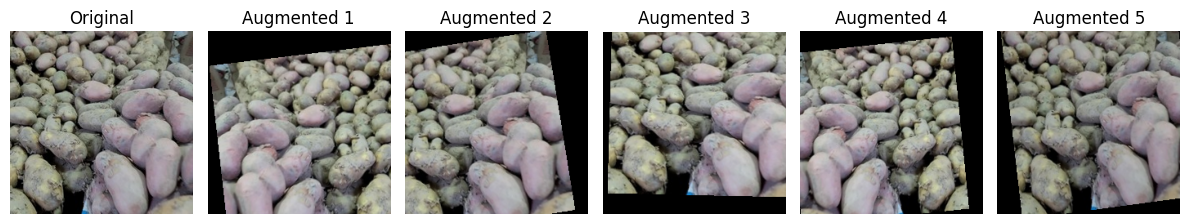

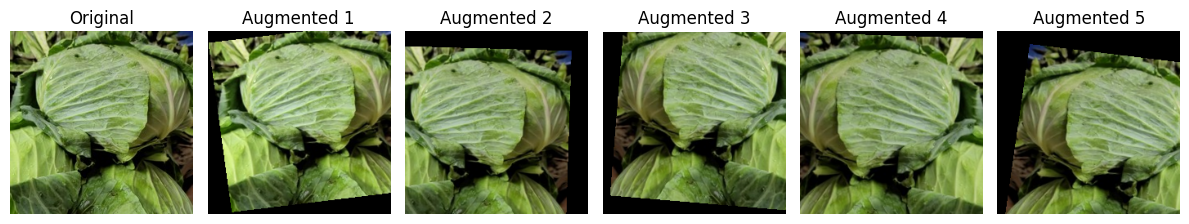

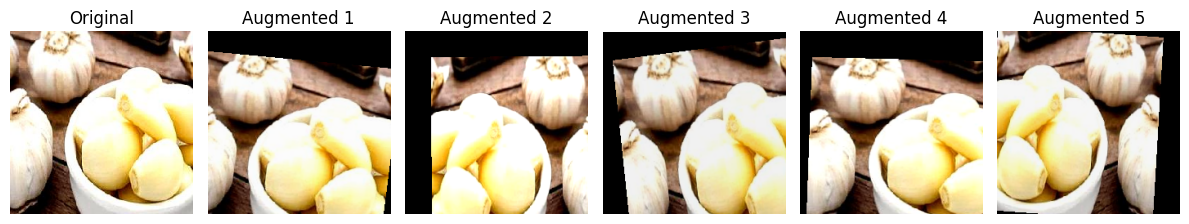

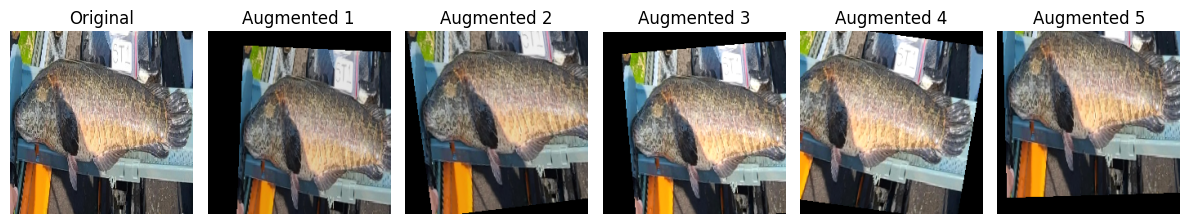

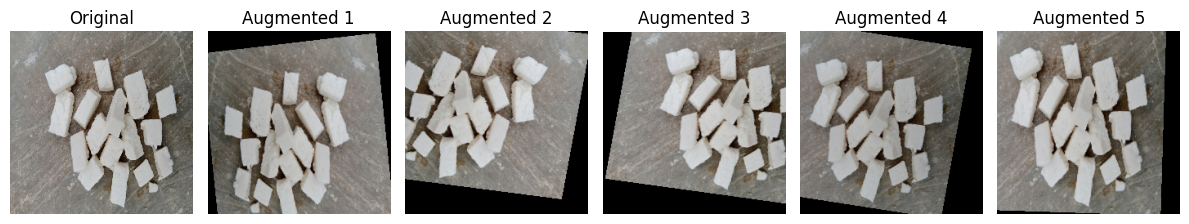

In [ ]:
def show_augmentation(original_img_path):
    img = load_img(original_img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 6, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    for i in range(5):
        augmented_img = train_datagen.random_transform(img_array[0])
        augmented_img = np.clip(augmented_img, 0, 255).astype('uint8')
        plt.subplot(1, 6, i + 2)
        plt.imshow(augmented_img)
        plt.title(f'Augmented {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

for _ in range(5):
    random_class = random.choice(class_names)
    class_dir = os.path.join(TRAIN_DIR, random_class)
    images = [f for f in os.listdir(class_dir)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if images:
        img_file = random.choice(images)
        img_path = os.path.join(class_dir, img_file)
        show_augmentation(img_path)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, InputLayer, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2

model = Sequential([
        InputLayer(shape=(IMG_SIZE, IMG_SIZE, 3)),

        Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.0005)),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.4),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(NUM_CLASSES, activation='softmax')
    ])

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()
total_params = model.count_params()
print(f"Total Parameters: {total_params}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,088 (1.87 MB)

 Trainable params: 490,128 (1.87 MB)

 Non-trainable params: 960 (3.75 KB)

Total Parameters: 491088


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/models/FINAL.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

callbacks = [early_stop, reduce_lr, checkpoint]

In [ ]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2167 - loss: 2.6407
Epoch 1: val_accuracy improved from -inf to 0.06256, saving model to /content/drive/MyDrive/models/FINAL.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.2179 - loss: 2.6374 - val_accuracy: 0.0626 - val_loss: 2.9416 - learning_rate: 1.0000e-04
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4616 - loss: 1.9249
Epoch 2: val_accuracy improved from 0.06256 to 0.13300, saving model to /content/drive/MyDrive/models/FINAL.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.4620 - loss: 1.9236 - val_accuracy: 0.1330 - val_loss: 3.0554 - learning_rate: 1.0000e-04
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5438 - loss: 1.6324
Epoch 3: val_accuracy improved from 0.13300 to 0.18227, saving model to /content/drive/MyDrive/models/FINAL.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.5440 - loss: 1.6318 - val_accuracy: 0.1823 - val_loss: 3.0184 - lea

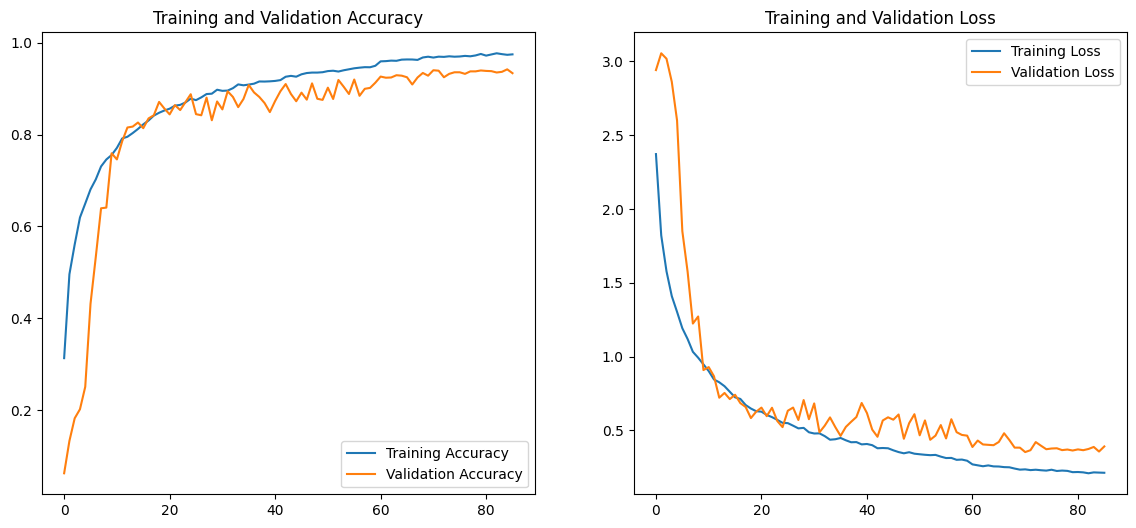

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 785ms/step - accuracy: 0.9402 - loss: 0.3475
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9446 - loss: 0.3347
Validation Accuracy: 93.99%
Test Accuracy: 92.29%


In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()
plot_training_history(history)

val_loss, val_accuracy = model.evaluate(val_generator)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

In [ ]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

best_model = load_model('/content/drive/MyDrive/models/FINAL.keras')
test_generator.reset()
preds = best_model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 751ms/step
Classification Report:
              precision    recall  f1-score   support

        ayam       0.84      0.95      0.89        86
bawang_merah       0.93      1.00      0.97        86
bawang_putih       0.82      0.94      0.88        86
     brokoli       0.98      0.97      0.97        86
      daging       1.00      1.00      1.00        86
        ikan       0.85      0.91      0.88        86
 kembang_kol       1.00      0.93      0.96        86
     kentang       0.97      0.97      0.97        86
       kubis       1.00      1.00      1.00        86
        tahu       0.80      0.85      0.82        84
       tauge       0.98      0.93      0.95        86
       telur       0.96      0.86      0.91        86
       tempe       0.91      0.85      0.88        86
      terong       0.98      0.93      0.95        86
      tomato       0.99      0.83      0.90        86
      wortel       0.90      0.92      0.91        86

    accuracy    

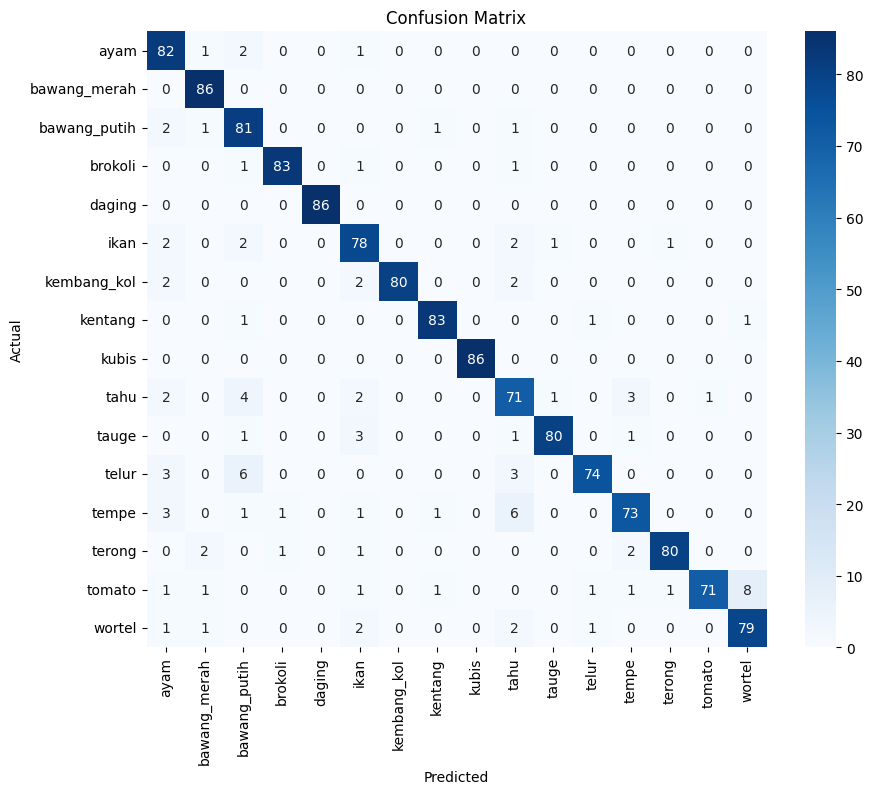

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
